In [1329]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [1330]:
df1 = pd.read_csv('WCrankings')
df2 = pd.read_csv('WCmatches')

In [1331]:
df1['Squad'] = df1['Squad'].str.split(n=1).str[1]
df1.loc[25, 'Squad'] = 'Iran'
df1.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Top Team Scorer,Goalkeeper
0,1,Argentina,7.0,4.0,2.0,1.0,15.0,8.0,7.0,14.0,15.1,4.6,10.4,1.49,Lionel Messi - 7,Emiliano Martínez
1,2,France,7.0,5.0,1.0,1.0,16.0,8.0,8.0,16.0,13.8,9.9,3.9,0.55,Kylian Mbappé - 8,Hugo Lloris
2,3,Croatia,7.0,2.0,4.0,1.0,8.0,7.0,1.0,10.0,7.0,11.0,-4.0,-0.58,Andrej Kramarić - 2,Dominik Livaković
3,4,Morocco,7.0,3.0,2.0,2.0,6.0,5.0,1.0,11.0,6.6,7.4,-0.8,-0.12,Youssef En-Nesyri - 2,Yassine Bounou
4,QF,Netherlands,5.0,3.0,2.0,0.0,10.0,4.0,6.0,11.0,4.6,6.1,-1.5,-0.29,Cody Gakpo - 3,Andries Noppert


In [1332]:
px.treemap(data_frame = df1, path = ['Squad'], values = 'GF')

In [1333]:
fig = px.bar(df1, x = 'Squad', y = 'xGD/90')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [1334]:
df1['Goals scored per xG'] = (df1['GF']/df1['xG']).round(2)
df1['Goals against per xG'] = (df1['GA']/df1['xGA']).round(2)

In [1335]:
y = df1['Squad']
x_f = df1['Goals scored per xG']
x_a = df1['Goals against per xG']


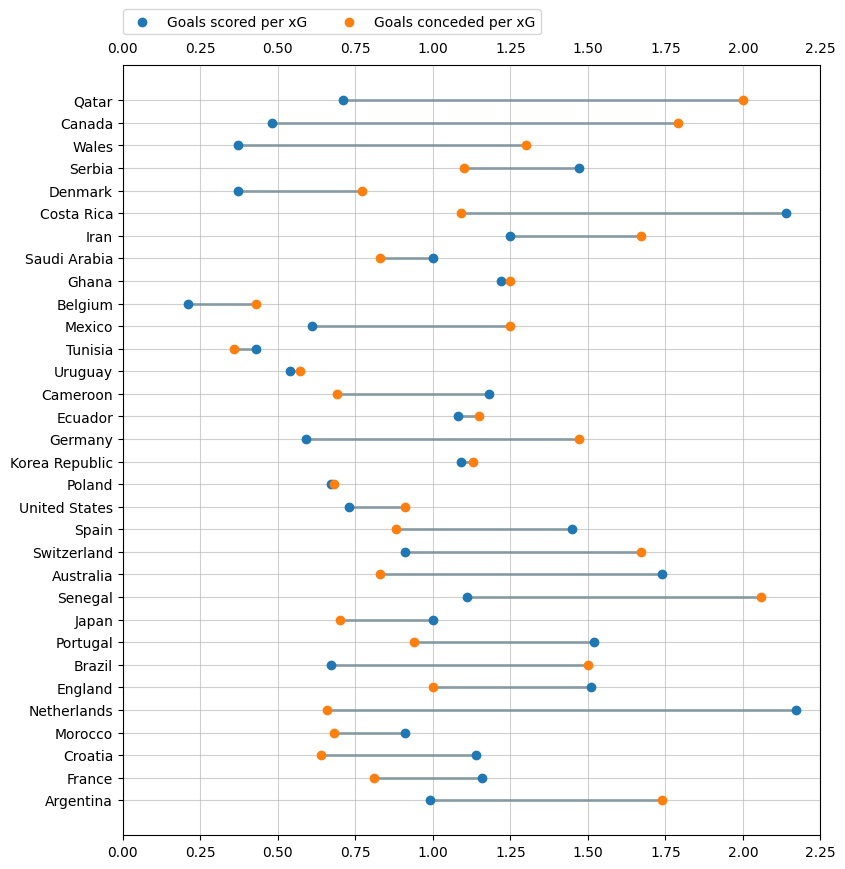

In [1336]:
fig, ax = plt.subplots(figsize = (9, 10))

ax.set_xlim(0,2.25)
ax.scatter(x_f, y, zorder = 3)
ax.scatter(x_a, y, zorder = 3)
ax.hlines(y, x_f, x_a, color = '#758D99', linewidth = 2, alpha = 0.8, zorder = 2)
ax.xaxis.set_tick_params(labeltop = True)
ax.legend(['Goals scored per xG', 'Goals conceded per xG'], ncol = 2, loc = [0, 1.04])
ax.grid(which = 'major', axis = 'both', alpha = 0.6, zorder = 1)

In [1337]:
df2.head()

,Round,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,Group stage,1.0,Sun,2022-11-20,19:00,Qatar qa,0.3,0–2,1.2,ec Ecuador,67372.0,Al Bayt Stadium (Neutral Site),Daniele Orsato,Match Report,NaN
1,Group stage,1.0,Mon,2022-11-21,16:00,England eng,2.1,6–2,1.4,ir IR Iran,45334.0,Khalifa International Stadium (Neutral Site),Raphael Claus,Match Report,NaN
2,Group stage,1.0,Mon,2022-11-21,19:00,Senegal sn,0.9,0–2,0.7,nl Netherlands,41721.0,Al Thumama Stadium (Neutral Site),Wilton Sampaio,Match Report,NaN
3,Group stage,1.0,Mon,2022-11-21,22:00,United States us,0.8,1–1,1.5,wls Wales,43418.0,Ahmed bin Ali Stadium (Neutral Site),Abdulrahman Ibrahim Al Jassim,Match Report,NaN
4,Group stage,1.0,Tue,2022-11-22,13:00,Argentina ar,2.2,1–2,0.1,sa Saudi Arabia,88012.0,Lusail Iconic Stadium (Neutral Site),Slavko Vinčič,Match Report,NaN


In [1338]:
df2['Total goals'] = ''

row_num = len(df2)
for i in range(row_num):
    string = df2.loc[i, 'Score']
    dash_loc = string.rfind('–')

    num1 = int(string[dash_loc - 1])
    num2 = int(string[dash_loc + 1])
    goals = num1 + num2

    df2.loc[i, 'Total goals'] = goals

In [1339]:
df2_sorted = df2.sort_values('Total goals', ascending = False).head(12)
df2_sorted['Home'] = df2_sorted['Home'].str.split(n=1).str[0]
df2_sorted['Away'] = df2_sorted['Away'].str.split(n=1).str[1]
df2_sorted.loc[1, 'Away'] = 'Iran'

df2_sorted['Fixture'] = df2_sorted['Home'] + ' v ' + df2_sorted['Away']

In [1340]:
fig = go.Figure(go.Bar(
            x= df2_sorted['Total goals'],
            y= df2_sorted['Fixture'],
            orientation='h'))

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.update_traces(hovertemplate= df2_sorted['Score'] + "<extra></extra>", marker_color = 'purple')

fig.show()

In [1341]:
df2.loc[:, 'Venue'] = df2.loc[:, 'Venue'].str.replace(' (Neutral Site)','')

In [1342]:
df3 = df2['Venue'].value_counts().rename_axis('Venue').reset_index(name='Goals per game')

In [1343]:
for i in range(len(df3)):
    string = df3.loc[i, 'Venue']
    goals = df2.loc[df2['Venue'] == string, 'Total goals'].sum()
    games = len(df2[df2['Venue'] == string])
    ratio = round(goals/games, 2)
    df3.loc[i, 'Goals per game'] = ratio

df3 = df3.sort_values('Goals per game', ascending = False)
df3

/var/folders/26/3bsy9m654g7_jnybrj3390640000gn/T/ipykernel_18365/1410200478.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,Venue,Goals per game
2,Khalifa International Stadium,3.88
0,Lusail Iconic Stadium,3.30
3,Al Thumama Stadium,3.00
6,Stadium 974,3.00
7,Al Janoub Stadium,2.57
1,Al Bayt Stadium,2.22
5,Ahmed bin Ali Stadium,1.71
4,Education City Stadium,1.62


In [1344]:
fig = go.Figure([go.Bar(x= df3['Venue'], y= df3['Goals per game'])])
fig.update_traces(marker_color='orange')
fig.show()